In [4]:
from sklearn.datasets import load_diabetes

In [14]:
import sklearn
sklearn.__version__

'1.6.1'

In [5]:
X,y = load_diabetes(return_X_y=True)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [8]:
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [11]:
y_pred = reg.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.4399338661568968

In [12]:
reg.coef_,reg.intercept_

(array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
        -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
         861.12700152,   52.42112238]),
 np.float64(151.88331005254167))

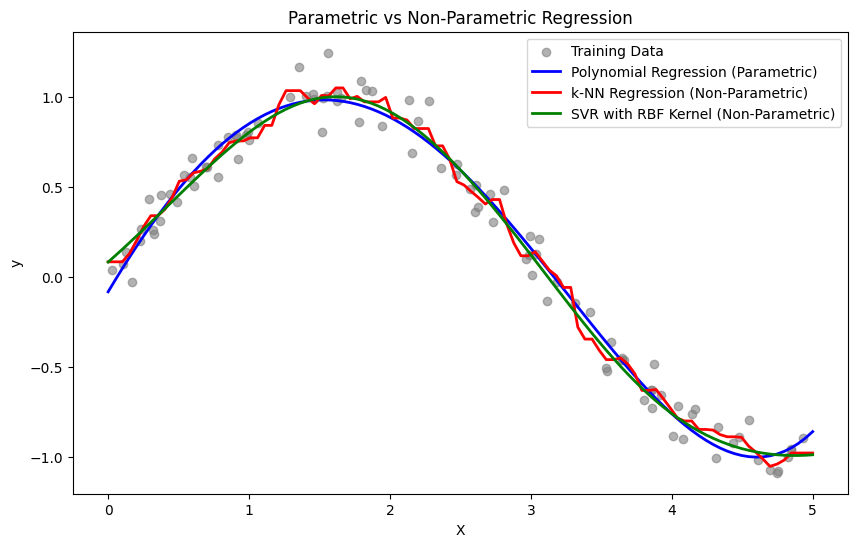

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import make_pipeline

# Step 1: Generate non-linear synthetic data
np.random.seed(42)
X = np.sort(5 * np.random.rand(100, 1), axis=0)  # Random X values (0 to 5)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Sine function + noise

# Step 2: Fit Polynomial Regression (Parametric)
poly_model = make_pipeline(PolynomialFeatures(degree=4), LinearRegression())
poly_model.fit(X, y)

# Step 3a: Fit k-NN Regression (Non-Parametric)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X, y)

# Step 3b: Fit SVR with RBF Kernel (Non-Parametric)
svr_model = SVR(kernel='rbf', C=10, gamma=0.5)  # C controls regularization, gamma controls kernel width
svr_model.fit(X, y)

# Step 4: Make predictions
X_test = np.linspace(0, 5, 100).reshape(-1, 1)
y_poly_pred = poly_model.predict(X_test)
y_knn_pred = knn_model.predict(X_test)
y_svr_pred = svr_model.predict(X_test)

# Plot results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='gray', label="Training Data", alpha=0.6)

plt.plot(X_test, y_poly_pred, label="Polynomial Regression (Parametric)", color='blue', linewidth=2)
plt.plot(X_test, y_knn_pred, label="k-NN Regression (Non-Parametric)", color='red', linewidth=2)
plt.plot(X_test, y_svr_pred, label="SVR with RBF Kernel (Non-Parametric)", color='green', linewidth=2)

plt.xlabel("X")
plt.ylabel("y")
plt.title("Parametric vs Non-Parametric Regression")
plt.legend()
plt.show()
